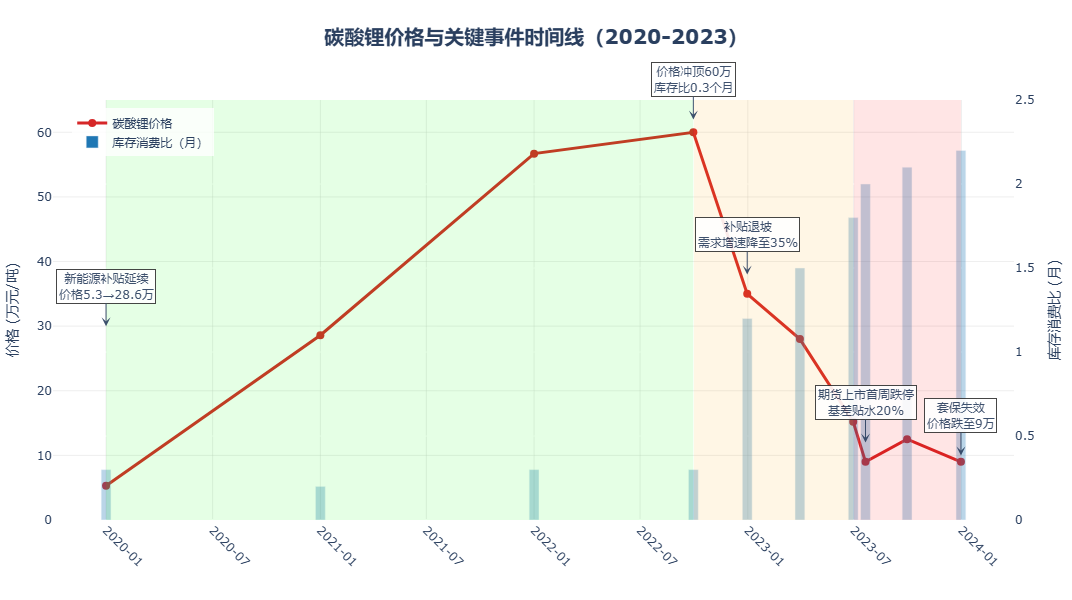

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [4]:
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime

# 构造数据
data = {
    'date': ['2020-01-01', '2021-01-01', '2022-01-01', '2022-09-30',
             '2022-12-31', '2023-03-31', '2023-06-30', '2023-07-21',
             '2023-09-30', '2023-12-31'],
    'price': [5.3, 28.6, 56.7, 60, 35, 28, 15.2, 9.0, 12.5, 9.0],
    'inventory_demand_ratio': [0.3, 0.2, 0.3, 0.3, 1.2, 1.5, 1.8, 2.0, 2.1, 2.2]
}
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

# 创建Figure对象
fig = go.Figure()

# 添加阶段背景色
fig.update_layout(
    shapes=[
        # 阶段一：供需紧张（2020-2022Q3）
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-01-01",
            y0=0,
            x1="2022-09-30",
            y1=1,
            fillcolor="rgba(0,255,0,0.1)",
            line_width=0
        ),
        # 阶段二：需求拐点（2022Q4-2023Q2）
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2022-10-01",
            y0=0,
            x1="2023-06-30",
            y1=1,
            fillcolor="rgba(255,165,0,0.1)",
            line_width=0
        ),
        # 阶段三：期货出清（2023Q3-2023Q4）
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2023-07-01",
            y0=0,
            x1="2023-12-31",
            y1=1,
            fillcolor="rgba(255,0,0,0.1)",
            line_width=0
        )
    ]
)

# 添加价格折线图
fig.add_trace(go.Scatter(
    x=df['date'],
    y=df['price'],
    name='碳酸锂价格',
    line=dict(color='#d62728', width=3),
    mode='lines+markers',
    marker=dict(size=8),
    hovertemplate="<b>%{x|%Y-%m}</b><br>价格：%{y}万元/吨<extra></extra>"
))

# 添加库存消费比柱状图
fig.add_trace(go.Bar(
    x=df['date'],
    y=df['inventory_demand_ratio'],
    name='库存消费比（月）',
    marker=dict(color='#1f77b4', opacity=0.3),
    yaxis='y2',
    hovertemplate="<b>%{x|%Y-%m}</b><br>库存消费比：%{y}个月<extra></extra>"
))

# 添加关键事件标注
events = [
    {
        "date": "2020-01-01",
        "text": "新能源补贴延续<br>价格5.3→28.6万",
        "y": 30
    },
    {
        "date": "2022-09-30",
        "text": "价格冲顶60万<br>库存比0.3个月",
        "y": 62
    },
    {
        "date": "2022-12-31",
        "text": "补贴退坡<br>需求增速降至35%",
        "y": 38
    },
    {
        "date": "2023-07-21",
        "text": "期货上市首周跌停<br>基差贴水20%",
        "y": 12
    },
    {
        "date": "2023-12-31",
        "text": "套保失效<br>价格跌至9万",
        "y": 10
    }
]

annotations = []
for event in events:
    annotations.append(
        dict(
            x=datetime.strptime(event["date"], "%Y-%m-%d"),
            y=event["y"],
            xref="x",
            yref="y",
            text=event["text"],
            showarrow=True,
            arrowhead=3,
            arrowsize=1.5,
            ax=0,
            ay=-40,
            bordercolor="#333",
            borderwidth=1,
            bgcolor="#fff",
            opacity=0.9
        )
    )

# 更新布局
fig.update_layout(
    title={
        'text': "<b>碳酸锂价格与关键事件时间线（2020-2023）</b>",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20)
    },
    xaxis=dict(
        tickformat="%Y-%m",
        tickangle=45,
        gridcolor='rgba(200,200,200,0.3)'
    ),
    yaxis=dict(
        title="价格 (万元/吨)",
        range=[0, 65],
        gridcolor='rgba(200,200,200,0.3)'
    ),
    yaxis2=dict(
        title="库存消费比 (月)",
        overlaying="y",
        side="right",
        range=[0, 2.5]
    ),
    legend=dict(
        x=0.02,
        y=0.98,
        bgcolor='rgba(255,255,255,0.8)'
    ),
    hovermode="x unified",
    plot_bgcolor='rgba(255,255,255,1)',
    annotations=annotations,
    margin=dict(l=50, r=50, t=100, b=80),
    width=1200,
    height=600
)

# 添加数据来源标注
fig.add_annotation(
    x=1,
    y=-0.25,
    xref="paper",
    yref="paper",
    text="数据来源：SMM、中国汽车工业协会（2024）",
    showarrow=False,
    font=dict(size=10, color="#666")
)

# 显示图表
fig.show()

# 保存为HTML文件
fig.write_html("lithium_price_timeline.html")

# 保存为图片
fig.write_image("lithium_price_timeline.png", scale=2)